### Business Objective:- 
###### This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.

### Loading important libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [2]:
bank_data = pd.read_csv('bankruptcy-prevention.csv',sep=';')
bank_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
bank_data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [5]:
bank_data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

#### We can see that there is typing error in the name of the columns there is a space at starting of the name and we can also see that there no null values in our dataset

In [6]:
colms = []
for col in bank_data.columns:
    col = col.strip()
    colms.append(col)
print(colms)

['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']


In [7]:
bank_data.columns = colms
bank_data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [8]:
duplicateentries = bank_data.duplicated().sum()
duplicateentries

147

In [9]:
bank_data.shape

(250, 7)

### Checking is there any missing values are there in data or not

In [10]:
bank_data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [11]:
bank_data_new = bank_data.iloc[:,:]
bank_data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [12]:
bank_data_new["class_yn"]=1
bank_data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


### Here we are changing the target variable to bankruptcy = 0, non-bankruptcy = 1


In [13]:
bank_data_new.loc[bank_data['class'] == 'bankruptcy','class_yn'] = 0

In [14]:
bank_data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [15]:
bank_data_new.drop('class' ,inplace=True, axis=1)
bank_data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


### Exploratory Data Analysis (EDA)

In [16]:
bank_data_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<AxesSubplot:>

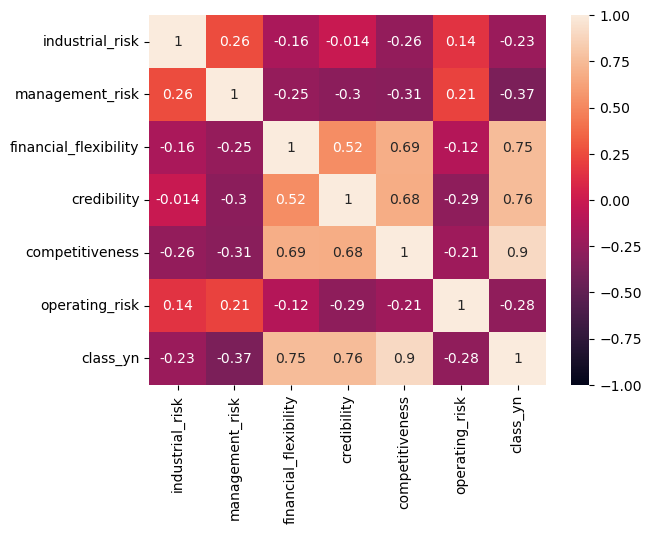

In [17]:
sns.heatmap(bank_data_new.corr(),vmin= -1, vmax= 1, annot=True)

<AxesSubplot:xlabel='class_yn', ylabel='count'>

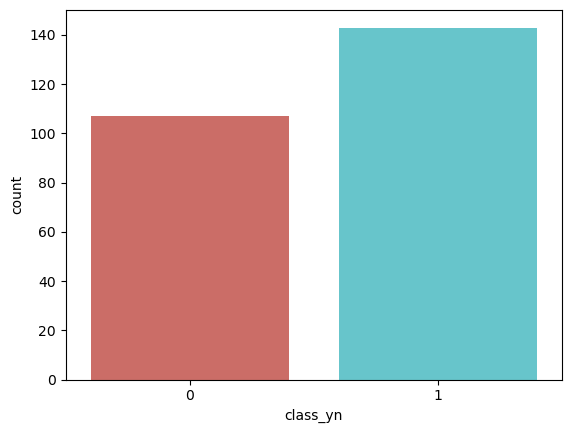

In [18]:
sns.countplot(x='class_yn', data=bank_data_new, palette='hls')

<AxesSubplot:xlabel='financial_flexibility', ylabel='count'>

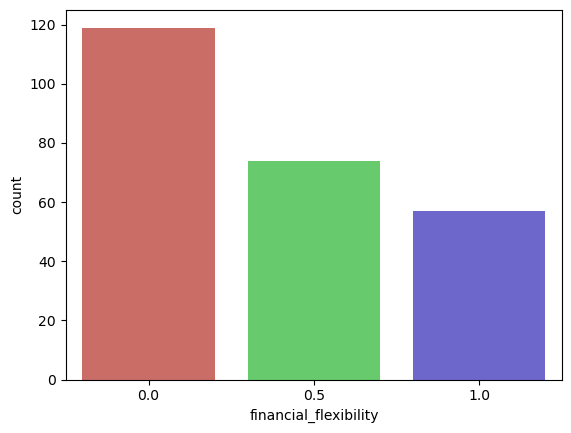

In [19]:
sns.countplot(x = 'financial_flexibility', data = bank_data_new, palette = 'hls')

<AxesSubplot:xlabel='class_yn'>

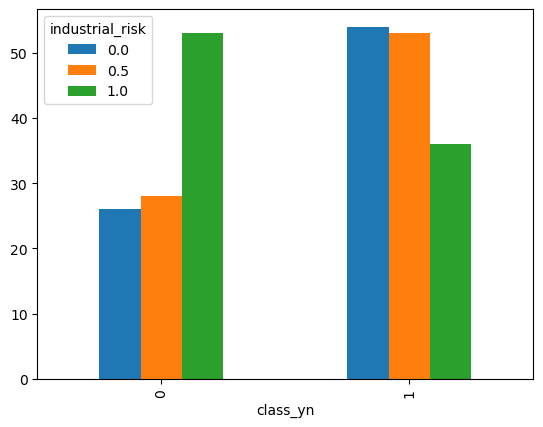

In [20]:
pd.crosstab(bank_data.class_yn, bank_data.industrial_risk).plot(kind='bar')

In [21]:
bank_data_new.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class_yn'],
      dtype='object')

<AxesSubplot:xlabel='financial_flexibility'>

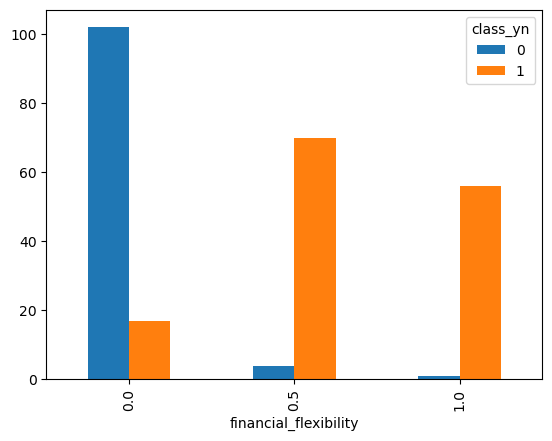

In [22]:
pd.crosstab(bank_data_new['financial_flexibility'], bank_data_new['class_yn']).plot(kind = 'bar')

<AxesSubplot:xlabel='credibility'>

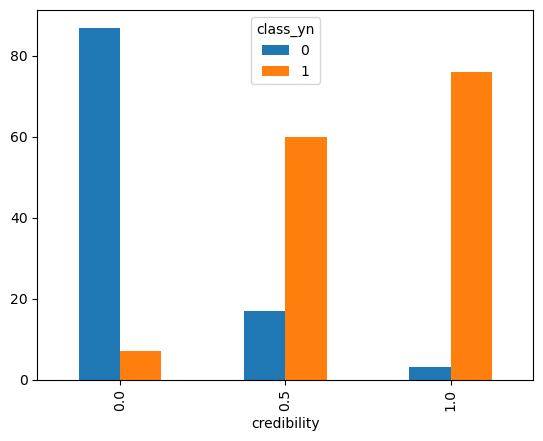

In [23]:
pd.crosstab(bank_data_new['credibility'], bank_data_new.class_yn).plot(kind = 'bar')

<AxesSubplot:xlabel='operating_risk'>

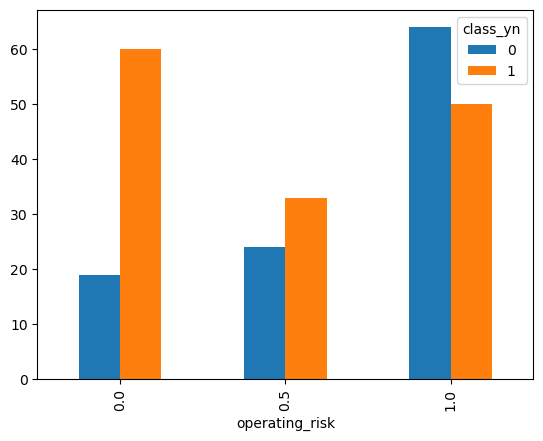

In [24]:
pd.crosstab(bank_data_new['operating_risk'], bank_data_new.class_yn).plot(kind='bar')

<AxesSubplot:xlabel='financial_flexibility'>

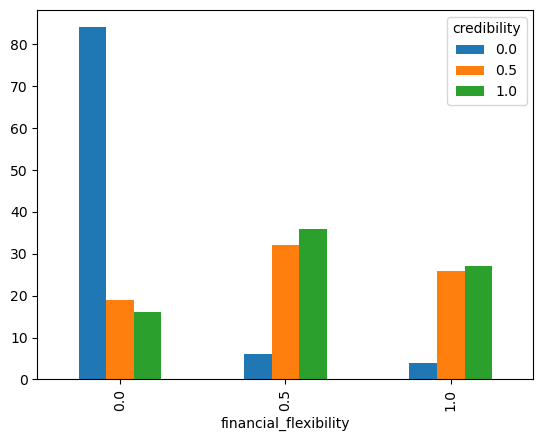

In [25]:
pd.crosstab(bank_data_new['financial_flexibility'], bank_data_new['credibility']).plot(kind = 'bar')

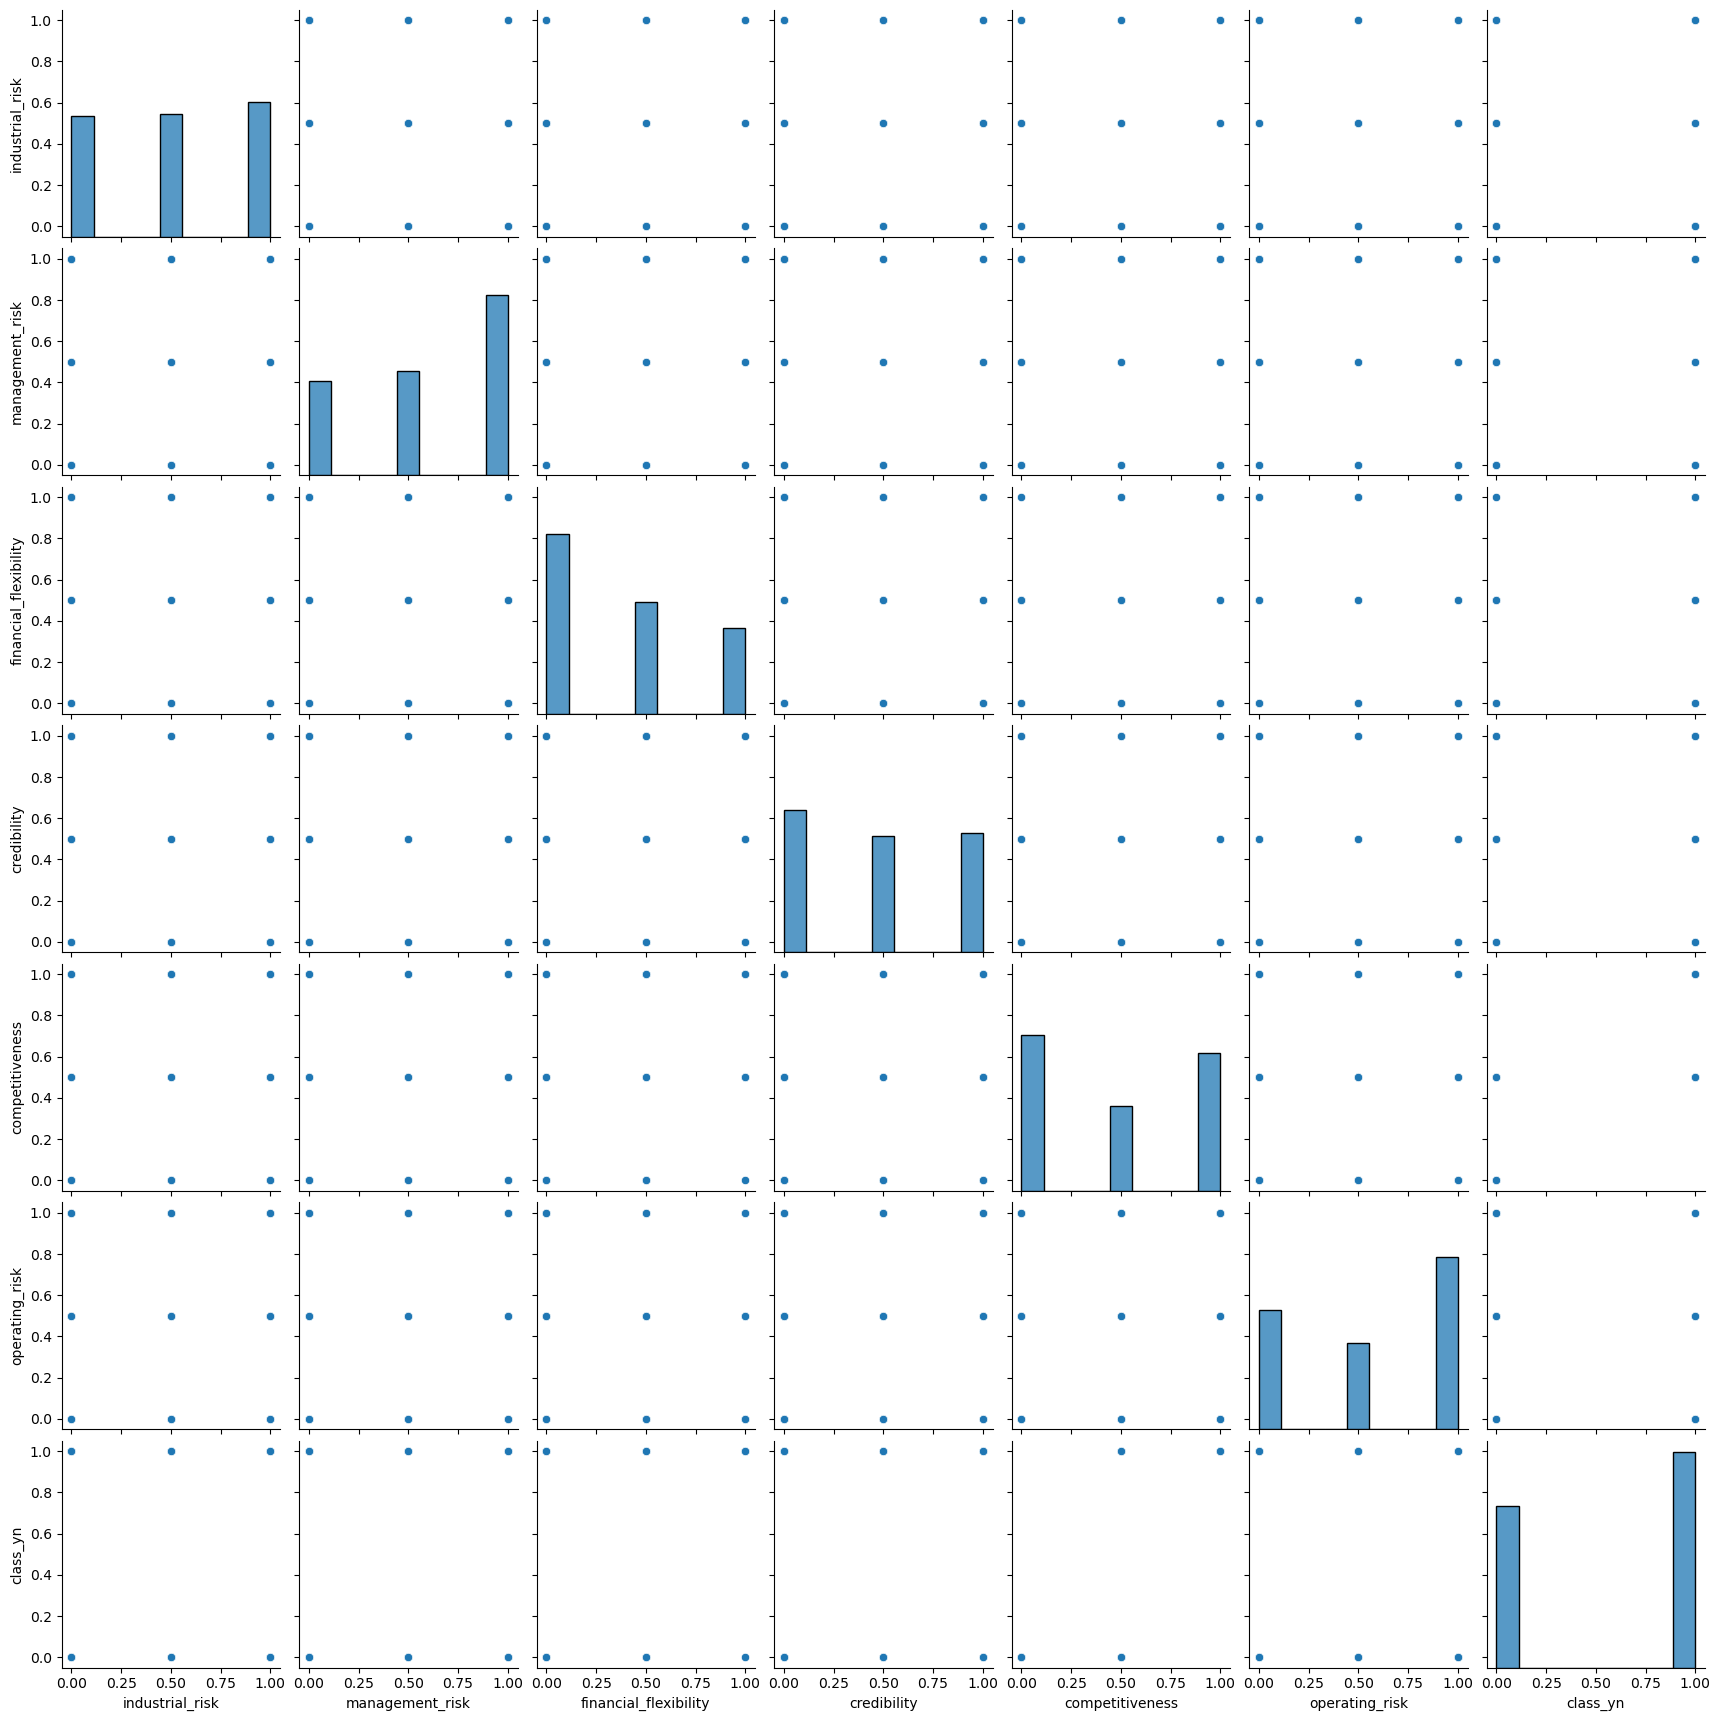

In [26]:
sns.pairplot(bank_data_new)

<AxesSubplot:>

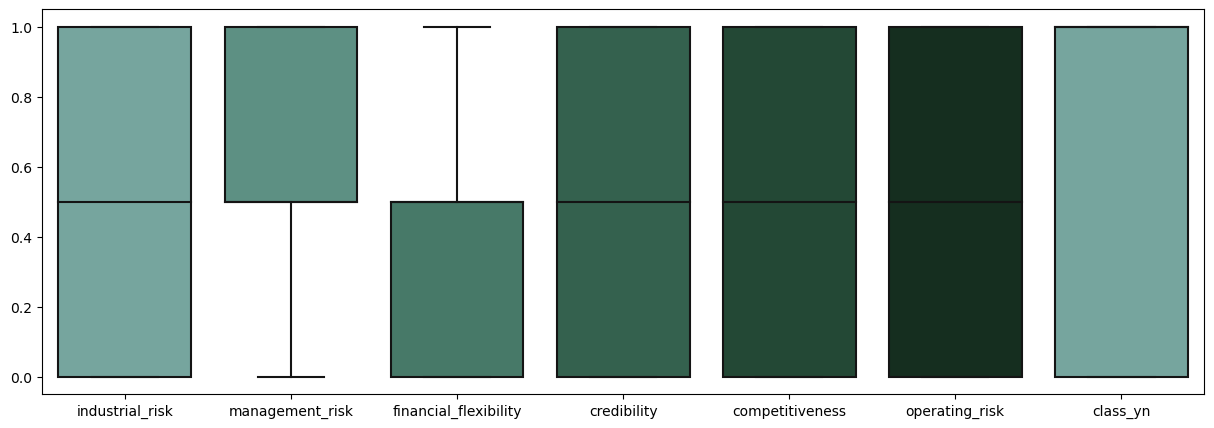

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data = bank_data_new, palette=sns.color_palette("ch:2,r=.2,l=.6"))

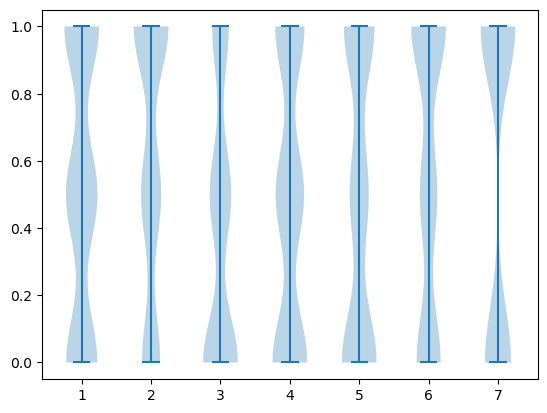

In [28]:
plt.violinplot(bank_data_new)
plt.show()

In [29]:
np.shape(bank_data_new)

(250, 7)

In [30]:
#Inpute
x = bank_data_new.iloc[:,:-1]
#Tareget veriable 
y = bank_data_new.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.metrics import classification_report

### Sliptting the data into train and test

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Preparing models

#### 1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logisticlassifier = LogisticRegression()

In [34]:
logisticlassifier.fit(x_train,y_train)
logisticlassifier.coef_

array([[-0.43044914, -0.73309162,  2.37729553,  2.31022854,  3.68601327,
        -0.53101906]])

#### After the traing the model then we prediction on test data

In [35]:
y_pred = logisticlassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

#### let's test the performance of our model - confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_logist = confusion_matrix(y_test, y_pred)
confusion_logist

array([[26,  0],
       [ 0, 37]], dtype=int64)

### Accuracy of a Model

#### Train Accuracy

In [38]:
train_acc_logist = np.mean(logisticlassifier.predict(x_train) == y_train)
train_acc_logist

0.9946524064171123

#### Test accuracy

In [39]:
test_acc_logist = np.mean(logisticlassifier.predict(x_test) == y_test)
test_acc_logist

1.0

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

### Accuracy of overall model

In [42]:
logisticlassifier.fit(x, y)
logisticlassifier.coef_

array([[-0.5741981 , -0.75397787,  2.61063166,  2.41434068,  4.00955826,
        -0.51358089]])

In [43]:
y_pred = logisticlassifier.predict(x)

confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix

array([[106,   1],
       [  0, 143]], dtype=int64)

In [44]:
acc = accuracy_score(y, y_pred)
acc

0.996

In [45]:
logisticlassifier.score(x_test, y_test)

1.0

In [46]:
logisticlassifier.score(x_train, y_train)

0.9946524064171123

### From the accuracy we can say that the model is overfitted to avoid overfit problem we use Regularozation method


#### here we have L1, L2 regularization

#### It turns out they have different but equally useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.

### L1 = lasso regularization

In [47]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol =0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [48]:
lasso_reg.score(x_test, y_test)

-0.0017265366431771234

In [49]:
lasso_reg.score(x_train, y_train)

0.0

### L2 = Ridge regularization

In [50]:
from sklearn.linear_model import Ridge

In [51]:
ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)

ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [52]:
ridge_reg.score(x_test, y_test)

0.768839856224332

In [53]:
ridge_reg.score(x_train, y_train)

0.7452859981668727

### 2. KNN model

In [54]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import warnings
warnings.filterwarnings('ignore')

#### To check k values

In [55]:
import math
math.sqrt(len(y_test))

7.937253933193772

##### Here we are choosing the k value to be 7 (choosing odd value)

##### Define the model KNN and fit model

In [56]:
KNN_classifier = KNC(n_neighbors =7, p = 2, metric = 'euclidean')

In [57]:
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

##### Predict the Test set results

In [58]:
y_pred = KNN_classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

##### Evaluate model

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 1 36]]


In [60]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.9863013698630138


##### Accuracy of KNN model

In [61]:
from sklearn.metrics import accuracy_score

KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

0.9841269841269841

### 3. Naive Bayes Classifier

In [62]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB

#### Creating GaussianNB and MultinomialNB functions

In [63]:
GNB = GaussianNB()
MNB = MultinomialNB()

#### Building the model with GaussianNB

In [64]:
Naive_GNB = GNB.fit(x_train ,y_train)

y_pred = Naive_GNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

#### Evaluate Model

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 0 37]]


#### Accuracy of GNB

In [66]:
from sklearn.metrics import accuracy_score

GNB_acc = accuracy_score(y_test , y_pred)
GNB_acc

1.0

#### Building the model with MultinomialNB

In [67]:
Naive_MNB = MNB.fit(x_train ,y_train)

y_pred = Naive_MNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

#### Evaluating Model

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  0]
 [ 0 37]]


#### Accuracy of MNB

In [69]:
from sklearn.metrics import accuracy_score

MNB_acc = accuracy_score(y_test , y_pred)
MNB_acc

1.0

### 4. Support Vector Machine

In [70]:
from sklearn.svm import SVC

#### Kernel = Linear model

In [71]:
model_linear = SVC(kernel = 'linear')

model_linear.fit(x_train, y_train)

pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear==y_test)

1.0

#### Kernel = ploy model

In [72]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

np.mean(pred_test_poly==y_test)

0.9841269841269841

#### Kernel = 'rbf' model --> Radial Basis Function

In [73]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

np.mean(pred_test_rbf==y_test)

1.0

#### from the above kernels in SVM polynomial kernel giving good accuracy

In [74]:
import pickle

In [93]:
filename = 'trained.sav'
pickle.dump(model_linear, open(filename,'wb'))

In [94]:
loaded_model = pickle.load(open('trained.sav','rb'))

In [95]:
loaded_model

SVC(kernel='linear')

In [96]:
#loaded_model = pd.read_csv('bankruptcy-prevention.csv')
input_data = (0.5,1,0,0,0,0.5)


input_data_as_numpy_array = np.asanyarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('bankruptcy') 
else:
    print('non-bankruptcy')

[0]
bankruptcy
